In [9]:
import os
import numpy as np
import mne
import pandas as pd
from glob import glob
import warnings
import pandas as pd

In [10]:
warnings.filterwarnings("ignore")

## BCI2A -NPZ dataset

In [31]:
# First import the data

# Number of subject, n + 1 for iteration purpose (there are 9 subjects)
ns = 10

# Creating dict to store original data and modified data
# ori_data will serve as initial loaded data that will remain unchanged
# mod_data will contain modified original data
ori_data = dict()
mod_data = dict() 

In [32]:
# Function to count subject
def subject_counter(i):
    return 'subject0{}'.format(i)

In [37]:
directory_path = "/Users/neranjhana/Downloads/datasets_npz/"

In [38]:
# Load the training data of all subjects

# Iter over all data path then store them in sub0X variable
for i in range(1, ns):
    data_path = os.path.join(directory_path, 'A{:02d}T.npz'.format(i))
    subject = 'subject{:02d}'.format(i)
    
    # Load EEG data from datapath and store into subj0X variabel then store into data dictionary
    ori_data[subject] = np.load(data_path)

In [41]:
#Ori data - dictionary, keys are subject1, subject 2,...
ori_data

{'subject01': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A01T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject02': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A02T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject03': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A03T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject04': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A04T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject05': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A05T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject06': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A06T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject07': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A07T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject08': NpzFile '/Users/neranjhana/Downloads/datasets_npz/A08T.npz' with keys: s, etyp, epos, edur, artifacts,
 'subject09': NpzFile '/Users/neranjhana/Downloads/datasets_npz/

## Visualization

In [47]:
# Peek into ori_data type and its keys 
print(type(ori_data['subject01']))

<class 'numpy.lib.npyio.NpzFile'>


In [46]:
print(ori_data['subject01'].files)

['s', 'etyp', 'epos', 'edur', 'artifacts']


Explanation regarding contents of the keys inside each subject data:
* **s**: 's' contains continuous time-series recorded EEG signals are, shape of M x N array. Size may vary between subjects but N is fixed to 25, indicates 25 electrodes with 22 first EEG and 3 last EOG
* **etype**: 'etyp' stands for event type which indicate event occurence, event code will be described in subsequent table
* **epos**: 'epos' stands for event position, denoting corresponding event begins at n-th sample at **'s'**
* **edur**: 'edur' stands for event duration, denoting duration of corresponding event
* **artifacts**: size of 288 x 1, 288 comes form 6 x 48, 6 runs where @run has 48 trials, @class has 12 trials

In [48]:
print(ori_data['subject01']['s'])

[[-21.14257812 -23.68164062 -21.484375   ...  31.73828125 -13.671875
  -43.9453125 ]
 [-21.92382812 -23.92578125 -24.31640625 ...  22.4609375  -13.18359375
  -40.52734375]
 [-15.625      -19.7265625  -18.84765625 ...  33.69140625  -8.30078125
  -38.57421875]
 ...
 [  5.51757812  10.49804688  14.94140625 ...   6.34765625 -37.109375
   16.6015625 ]
 [  1.46484375   3.07617188   9.22851562 ...  -4.39453125 -47.8515625
   12.6953125 ]
 [  1.3671875    3.515625     7.86132812 ...  -4.39453125 -45.41015625
    7.8125    ]]


In [49]:
print(ori_data['subject01']['etyp'])

[[32766]
 [  276]
 [32766]
 [  277]
 [32766]
 [ 1072]
 [32766]
 [  768]
 [  772]
 [  768]
 [  771]
 [  768]
 [  770]
 [  768]
 [  769]
 [  768]
 [  769]
 [  768]
 [  770]
 [  768]
 [  771]
 [  768]
 [  772]
 [  768]
 [  770]
 [  768]
 [  771]
 [  768]
 [  769]
 [  768]
 [  769]
 [  768]
 [  769]
 [  768]
 [  772]
 [  768]
 [  770]
 [  768]
 [  770]
 [  768]
 [  769]
 [  768]
 [  769]
 [  768]
 [  771]
 [  768]
 [  769]
 [  768]
 [  770]
 [  768]
 [ 1023]
 [  772]
 [  768]
 [  772]
 [  768]
 [  771]
 [  768]
 [  769]
 [  768]
 [  772]
 [  768]
 [  772]
 [  768]
 [  770]
 [  768]
 [  772]
 [  768]
 [  772]
 [  768]
 [  770]
 [  768]
 [  769]
 [  768]
 [  770]
 [  768]
 [  771]
 [  768]
 [  771]
 [  768]
 [  771]
 [  768]
 [  772]
 [  768]
 [  771]
 [  768]
 [  769]
 [  768]
 [  772]
 [  768]
 [  770]
 [  768]
 [  771]
 [  768]
 [  770]
 [  768]
 [  771]
 [  768]
 [  772]
 [  768]
 [ 1023]
 [  770]
 [  768]
 [  771]
 [  768]
 [  769]
 [32766]
 [  768]
 [  769]
 [  768]
 [  769]
 [  768]
 

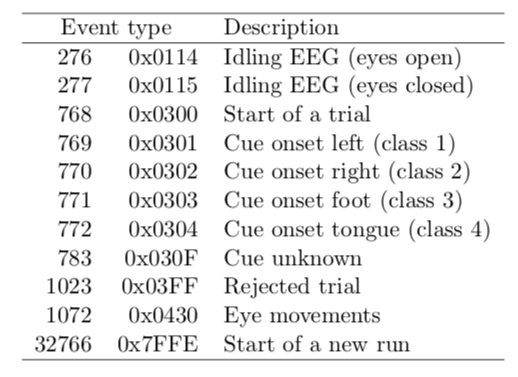

In [50]:
print(ori_data['subject01']['epos'])

[[     1]
 [     1]
 [ 29684]
 [ 29684]
 [ 49956]
 [ 49956]
 [ 91519]
 [ 91869]
 [ 92369]
 [ 93872]
 [ 94372]
 [ 95790]
 [ 96290]
 [ 97742]
 [ 98242]
 [ 99750]
 [100250]
 [101861]
 [102361]
 [103778]
 [104278]
 [105828]
 [106328]
 [107759]
 [108259]
 [109757]
 [110257]
 [111663]
 [112163]
 [113558]
 [114058]
 [115530]
 [116030]
 [117474]
 [117974]
 [119441]
 [119941]
 [121561]
 [122061]
 [123569]
 [124069]
 [125635]
 [126135]
 [127671]
 [128171]
 [129737]
 [130237]
 [131807]
 [132307]
 [133887]
 [133887]
 [134387]
 [135799]
 [136299]
 [137830]
 [138330]
 [139783]
 [140283]
 [141744]
 [142244]
 [143848]
 [144348]
 [145852]
 [146352]
 [147827]
 [148327]
 [149853]
 [150353]
 [151924]
 [152424]
 [154031]
 [154531]
 [156123]
 [156623]
 [158214]
 [158714]
 [160257]
 [160757]
 [162321]
 [162821]
 [164341]
 [164841]
 [166313]
 [166813]
 [168276]
 [168776]
 [170201]
 [170701]
 [172282]
 [172782]
 [174260]
 [174760]
 [176250]
 [176750]
 [178369]
 [178869]
 [180275]
 [180775]
 [182203]
 [182203]


In [51]:
print(ori_data['subject01']['edur'])

[[    0]
 [29682]
 [    0]
 [20271]
 [    0]
 [41562]
 [    0]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [    0]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 

In [52]:
print(ori_data['subject01']['artifacts'])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [57]:
# Peek into different shape of recorded data/'s' between subjects
print('Sample\tElectrodes')
for i in range(1, ns):
    subj_temp = subject_counter(i)
    print(ori_data[subj_temp]['s'].shape)

Sample	Electrodes
(672528, 25)
(677169, 25)
(660530, 25)
(600915, 25)
(686120, 25)
(678980, 25)
(681071, 25)
(675270, 25)
(673328, 25)


In [61]:
#Visulaizing data for subject1
#Each column corresponds to 1 electrode -> 25 columns
#First 22 are EEG, last 3 are EOG

In [60]:
pd.DataFrame(ori_data['subject01']['s']).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734,31.738281,-13.671875,-43.945312
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844,22.460938,-13.183594,-40.527344
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375,33.691406,-8.300781,-38.574219
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922,41.992188,-7.324219,-38.574219
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203,37.109375,-15.136719,-49.804688


Extracting an event and plotting it

Extracting Event C3 of Subject1

In [69]:
from matplotlib import pyplot as plt
import numpy as np
#  data of the subject 1
signal = ori_data['subject01']['s']

In [70]:
# The index 7 represent the channel C3
channelC3 = signal[:, 7]
x = 7  # this is the event number that I want to extract

In [72]:
# Extract the type of the event 7
etype = ori_data['subject01']['etyp'].T[0, x]
print(etype)

768


In [73]:
#in this case the type is 768 -> 768 corresponds to start of trial

In [ ]:
epos = ori_data['subject01']['epos'].T[0, x] # This is the position of the event in the raw signal
edur = ori_data['subject01']['edur'].T[0, x]  # This is the duration of this event

In [74]:
# Then I extract the signal related the event selected.
trial = channelC3[epos:epos+edur]
print(trial)

[0.1953125  2.00195312 2.29492188 ... 6.68945312 6.10351562 6.20117188]


In [78]:
trial_type = ori_data['subject01']['etyp'].T[0, x+1]
print("Trial type:", trial_type)

Trial type: 772


In [79]:
## you can observe the next event is 772 (Cue onset tongue) with that you can deduce de class of
# this trial: Tongue Imagery Task.

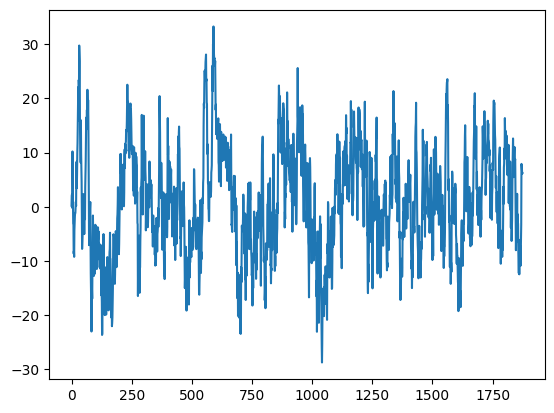

In [76]:
# For know the order of this events, you can see the data['etyp'] array.

# You can plot this event with matplotlib
plt.plot(trial)
plt.show()

## Preprocessing

In [56]:
mod_data

{'subject01': {},
 'subject02': {},
 'subject03': {},
 'subject04': {},
 'subject05': {},
 'subject06': {},
 'subject07': {},
 'subject08': {},
 'subject09': {}}

In [55]:
# ori_data will contain original data that is the raw file
# mod_data will contain modified original data -> after preprocessing

# Initialize 'subject0x' dict inside mod_data
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj] = {}

In [62]:
# First copying the sample data from ori_data into mod_data
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']

In [63]:
# Removing last three EOG electrode using np.delete, store data as EEG_only to each subject dict
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj]['raw_EEG'] = np.delete(mod_data[subj]['raw_EEG'], np.s_[22:], 1)

## Bandpass Filtering
The first stage employing a filter bank is to decompose EEG into multiple frequency pass band, using causal Chebysev Type II filter/ Butterworth Filter.  
A total of 9 band-pass filters are used, namely, 4-8, 8-12, ... 36-40 Hz  
These frequency ranges are used because they yielf a stable frequency response and cover range of 4-40 Hz

In [82]:
def butter_bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal, axis=-1)
    
    return y

### Filtering EEG signal with Butterworth Band-pass
Following the steps mentioned in [1], there will be 8 band-pass filter with bandwidth of:
1. 4-8Hz
2. 8-12Hz
3. 12-16Hz
4. 16-20Hz
5. 20-24Hz
6. 24-28Hz
7. 28-32Hz
8. 32-36Hz
9. 36-40Hz

Apply filter to the time-series axis, thus set 'raw_EEG' inside each subject to shape of N x T (i.e. electrodes x samples)

In [83]:
# Band pass filter with butterworth filter
from scipy.signal import butter, lfilter
from scipy.signal import freqz

In [84]:
def butter_bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal, axis=-1)
    
    return y

In [85]:
# Transpose all 'raw_EEG' data
for i in range(1, ns):
    subj = subject_counter(i)
    
    while mod_data[subj]['raw_EEG'].shape[0] != 22:
        mod_data[subj]['raw_EEG'] = mod_data[subj]['raw_EEG'].T
    
    print(mod_data[subj]['raw_EEG'].shape)

(22, 672528)
(22, 677169)
(22, 660530)
(22, 600915)
(22, 686120)
(22, 678980)
(22, 681071)
(22, 675270)
(22, 673328)


In [86]:
# Create function that could bandpass filtered one subject
def butter_bandpass_one_subject(data, subj, lowcut, highcut, fs, interval=None):
    print('Processing ', subj)
    
    # Create new key 'EEG_filtered' to store filtered EEG of each subject
    data[subj]['EEG_filtered'] = {}
    
    # Current raw EEG
    temp_raw_EEG = data[subj]['raw_EEG']
    
    if interval is not None:
        startband = np.arange(lowcut, highcut, step = interval)
        
        for start in startband:
            # This will be new key inside the EEG_filtered
            band = "{:02d}_{:02d}".format(start, start+interval)
            
            print('Filtering through {} Hz band'.format(band))
            # Bandpass filtering
            data[subj]['EEG_filtered'][band] = {}
            data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, start, start+interval, fs)
            
    else:
        # This will be new key inside the EEG_filtered
        band = "{:02d}_{:02d}".format(lowcut, highcut)
        
        data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, lowcut, highcut, fs)

In [87]:
# Bandpass filtering all subject 
lowcut=4
highcut=40
fs = 250

# Iterate over all subjects
for i in range(1, 4):
    subj = subject_counter(i)
    butter_bandpass_one_subject(mod_data, subj, lowcut, highcut, fs, interval=4)
    print('')

Processing  subject01
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

Processing  subject02
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

Processing  subject03
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

